In [1]:
from catboost import CatBoostRegressor
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import (
    make_circles,
    make_moons,
)

import sys
sys.path.append('../')
from ssbgm import ScoreBasedGenerator

In [2]:
np.random.seed(0)
N = 10000

100%|██████████| 10999/10999 [00:04<00:00, 2418.55it/s]


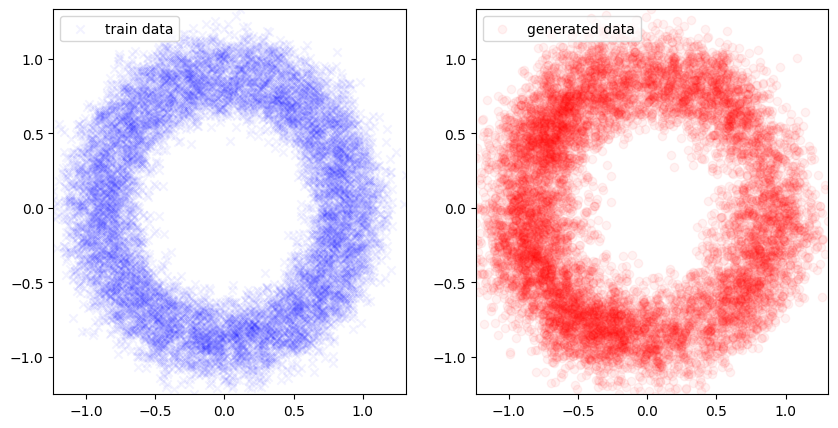

In [ ]:
# Case: make_circles

# generate a training dataset
X_train = make_circles(n_samples=N, noise=0.1, random_state=0)[0]

# train a generative model with score-based model
gm = ScoreBasedGenerator(
    estimator=CatBoostRegressor(
        verbose=0,
        loss_function='MultiRMSE',
        random_state=42,
    )
)
gm.fit(
    X_train,
    noise_strengths=np.sqrt(np.logspace(-3, np.log10(max(np.var(X_train, axis=0))), 100)),
)

# generate samples from the trained model
X_gen = gm.sample(n_samples=N, alpha=0.005, sigma=1e-3, n_warmup=N//10).squeeze()

# plot the results
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].scatter(X_train[:, 0], X_train[:, 1], label='train data', color='blue', alpha=0.05, marker='x')
axs[1].scatter(X_gen[:, 0], X_gen[:, 1], label='generated data', color='red', alpha=0.05, marker='o')
for ax in axs:
    ax.legend(loc='upper left')
    ax.set_xlim(X_train[:, 0].min(), X_train[:, 0].max())
    ax.set_ylim(X_train[:, 1].min(), X_train[:, 1].max())
plt.show()

100%|██████████| 10999/10999 [00:04<00:00, 2312.43it/s]


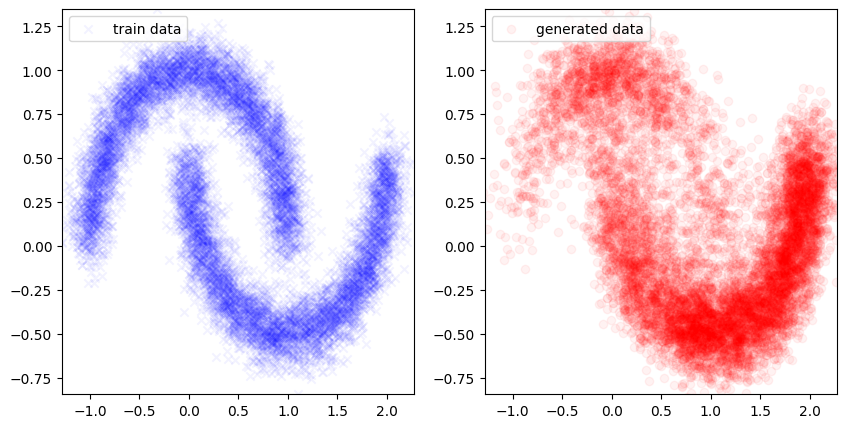

In [4]:
# Case: make_moons

# generate a training dataset
X_train = make_moons(n_samples=N, noise=0.1, random_state=0)[0]

# train a generative model with score-based model
gm = ScoreBasedGenerator(
    estimator=CatBoostRegressor(
        verbose=0,
        loss_function='MultiRMSE',
        random_state=42,
    )
)
gm.fit(
    X_train,
    noise_strengths=np.sqrt(np.logspace(-3, np.log10(max(np.var(X_train, axis=0))), 11)),
)

# generate samples from the trained model
X_gen = gm.sample(n_samples=N, alpha=0.005, sigma=1e-3, n_warmup=N//10).squeeze()

# plot the results
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].scatter(X_train[:, 0], X_train[:, 1], label='train data', color='blue', alpha=0.05, marker='x')
axs[1].scatter(X_gen[:, 0], X_gen[:, 1], label='generated data', color='red', alpha=0.05, marker='o')
for ax in axs:
    ax.legend(loc='upper left')
    ax.set_xlim(X_train[:, 0].min(), X_train[:, 0].max())
    ax.set_ylim(X_train[:, 1].min(), X_train[:, 1].max())
plt.show()